In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import arabic_reshaper
from bidi.algorithm import get_display

#load dataset
df = pd.read_csv('number_of_teachers.csv')
df.head

<bound method NDFrame.head of             id       region              leve   type  \
0            1         حائل    التربية الخاصة  حكومي   
1            2  مكة المكرمة  المرحلة المتوسطة  حكومي   
2            3  مكة المكرمة    التربية الخاصة  حكومي   
3            4         عسير    التربية الخاصة  حكومي   
4            5  مكة المكرمة    التربية الخاصة  حكومي   
...        ...          ...               ...    ...   
140433  140434        الجوف  المرحلة الثانوية   أهلي   
140434  140435        الجوف  المرحلة الثانوية  حكومي   
140435  140436  مكة المكرمة  المرحلة الثانوية  حكومي   
140436  140437         حائل  المرحلة الثانوية  حكومي   
140437  140438       الرياض  المرحلة الثانوية  حكومي   

                                        office gender school_type    edu_type  \
0                مكتب التربية والتعليم بالشمال   بنين  تربية خاصة  تربية خاصة   
1       مكتب التربية والتعليم جنوب مكة المكرمة   بنات       نهاري  تعليم عام    
2                                      القنفذة   بنين 

In [101]:
#explore data
print('number of rows',df.shape)
print("\n Data types:\n ",df.dtypes)
null_counts = df.isnull().sum()
print("Null counts per column:")
print(null_counts)



number of rows (140438, 13)

 Data types:
  id              int64
region         object
leve           object
type           object
office         object
gender         object
school_type    object
edu_type       object
ude_sys        object
saudi           int64
not_saudi       int64
teachers        int64
year            int64
dtype: object
Null counts per column:
id             0
region         0
leve           0
type           0
office         7
gender         0
school_type    0
edu_type       0
ude_sys        0
saudi          0
not_saudi      0
teachers       0
year           0
dtype: int64


In [4]:
#examine the first rows
print("\n First rows\n",df.head())


 First rows
     id المنطقة الإدارية           المرحلة السلطة  \
0  1.0             حائل    التربية الخاصة  حكومي   
1  2.0      مكة المكرمة  المرحلة المتوسطة  حكومي   
2  3.0      مكة المكرمة    التربية الخاصة  حكومي   
3  4.0             عسير    التربية الخاصة  حكومي   
4  5.0      مكة المكرمة    التربية الخاصة  حكومي   

                             مكتب التربية الجنس نوع المدرسة نوع التعليم  \
0           مكتب التربية والتعليم بالشمال  بنين  تربية خاصة  تربية خاصة   
1  مكتب التربية والتعليم جنوب مكة المكرمة  بنات       نهاري  تعليم عام    
2                                 القنفذة  بنين  تربية خاصة  تربية خاصة   
3                                   محايل  بنات  تربية خاصة  تربية خاصة   
4                                 القنفذة  بنين  تربية خاصة  تربية خاصة   

  نظام الدراسة  معلم سعودي  معلم غير سعودي  معلمين جملة   السنة  
0          عام         4.0             0.0          4.0  1437.0  
1          عام        17.0             0.0         17.0  1437.0  
2          عام         6

In [103]:
#delete missing values
missing_values = df.isnull().sum().sum()
if missing_values == 0:
    print("No missing values in the dataset.")
else:
    print("There are {} missing values in the dataset.".format(missing_values))

duplicate_entries = df.duplicated().sum()
if duplicate_entries == 0:
    print("No duplicate entries in the dataset.")
else:
    print("There are {} duplicate entries in the dataset.".format(duplicate_entries))


There are 7 missing values in the dataset.
No duplicate entries in the dataset.


In [104]:
string_columns = df.select_dtypes(include='object').columns
mode_values = df[string_columns].mode().iloc[0]

df[string_columns] = df[string_columns].fillna(mode_values)


In [105]:
missing_values = df.isnull().sum().sum()
if missing_values == 0:
    print("No missing values in the dataset.")
else:
    print("There are {} missing values in the dataset.".format(missing_values))

duplicate_entries = df.duplicated().sum()
if duplicate_entries == 0:
    print("No duplicate entries in the dataset.")
else:
    print("There are {} duplicate entries in the dataset.".format(duplicate_entries))


No missing values in the dataset.
No duplicate entries in the dataset.


In [141]:
#drop unnecessary colums
df = df.drop(columns='teachers')

print(df.head())


   id   region              leve   type  \
0   1  Nothing    التربية الخاصة  حكومي   
1   2  Nothing  المرحلة المتوسطة  حكومي   
2   3  Nothing    التربية الخاصة  حكومي   
3   4  Nothing    التربية الخاصة  حكومي   
4   5  Nothing    التربية الخاصة  حكومي   

                                   office gender school_type    edu_type  \
0           مكتب التربية والتعليم بالشمال   بنين  تربية خاصة  تربية خاصة   
1  مكتب التربية والتعليم جنوب مكة المكرمة   بنات       نهاري  تعليم عام    
2                                 القنفذة   بنين  تربية خاصة  تربية خاصة   
3                                   محايل   بنات  تربية خاصة  تربية خاصة   
4                                 القنفذة   بنين  تربية خاصة  تربية خاصة   

  ude_sys  saudi  not_saudi  year  level  
0     عام      4          0  1437      5  
1     عام     17          0  1437      5  
2     عام      6          0  1437      5  
3     عام      1          0  1437      5  
4     عام      1          0  1437      5  


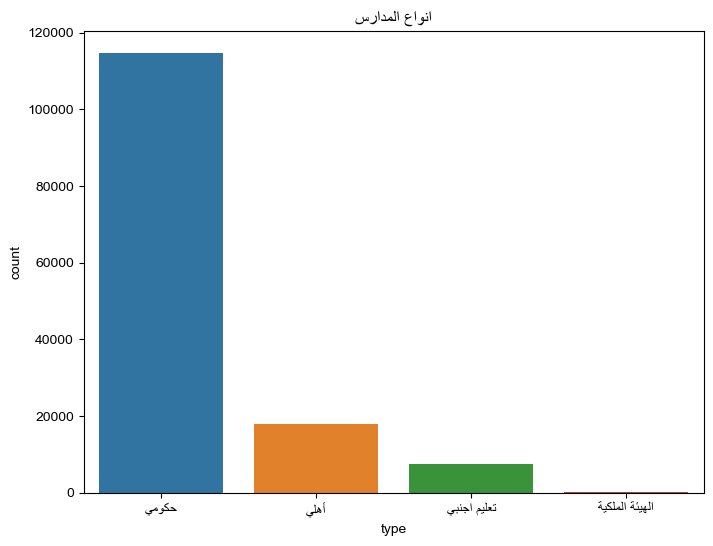

In [134]:
#data visualization
category_counts = df['type'].value_counts()

reshaped_labels = [get_display(arabic_reshaper.reshape(label)) for label in category_counts.index]

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='type', data=df)

ax.set_xticklabels(reshaped_labels)

# Set title and axis labels
plt.title(get_display(arabic_reshaper.reshape('انواع المدارس')))
plt.xlabel(get_display(arabic_reshaper.reshape('type')))
plt.ylabel(get_display(arabic_reshaper.reshape('count')))
plt.show()


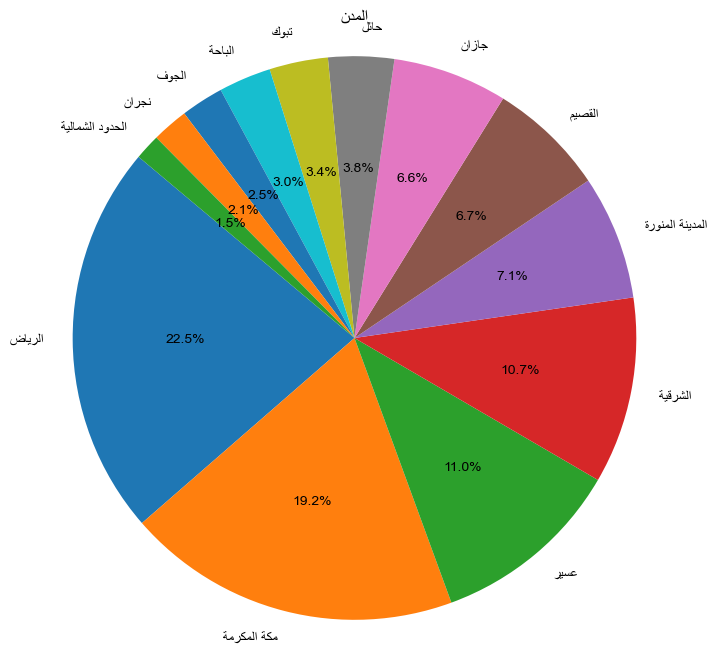

In [135]:
#data visualization
category_counts = df['region'].value_counts()

reshaped_labels = [get_display(arabic_reshaper.reshape(label)) for label in category_counts.index]

plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=reshaped_labels, autopct='%1.1f%%', startangle=140)
plt.title(get_display(arabic_reshaper.reshape('المدن')))
plt.axis('equal') 
plt.show()


In [ ]:
#save data
file_path = "numberofteach.csv"

df.to_csv(file_path, index=False)

print("Data saved successfully to:", file_path)
